# Clustering with DBSCAN Algorithm

# Practice Session

###Task 1

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.datasets import make_circles
import warnings
warnings.filterwarnings("ignore")

### Generating Data

In [ ]:
np.random.seed(42)
#function for creating data points
def PointsInCircum(r,n=100):
  return [((math.cos(2*math.pi/n*x)*r)+np.random.normal(-20,20),math.sin(2*math.pi/n*x)*r+np.random.normal(-20,20)) for x in range(1,n+1)]


In [ ]:
#creating data points in the form of circle
import math
df=pd.DataFrame(PointsInCircum(400,900))
df=df.append(PointsInCircum(250,600))
df=df.append(PointsInCircum(90,200))

In [ ]:
#Adding noise to the dataset
df=df.append([(np.random.randint(-500,500),np.random.randint(-500,500)) for i in range(300)])

In [ ]:
df.shape

(2000, 2)

In [ ]:
df2=df

### Visualizing Data

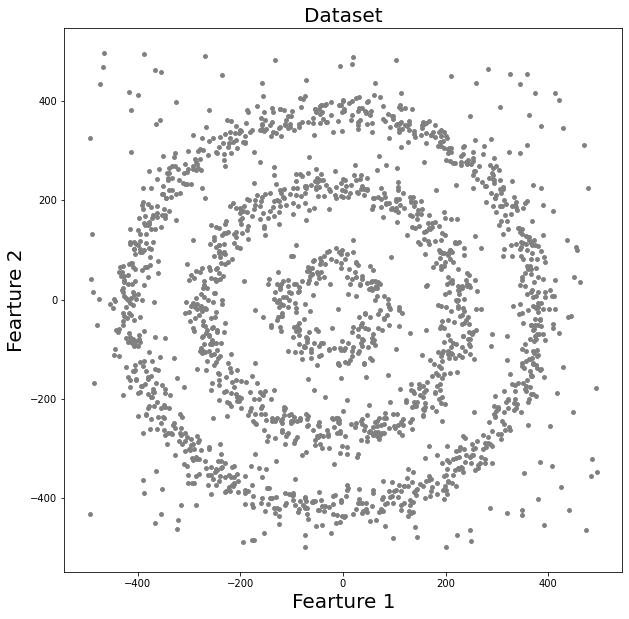

In [ ]:
#plotting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Fearture 1',fontsize=20)
plt.ylabel('Fearture 2',fontsize=20)
plt.show()

## TAsk 2

### Applying K-Means Algorithm to cluster the data

In [ ]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2,random_state=42)
k_means.fit(df)

KMeans(n_clusters=2, random_state=42)

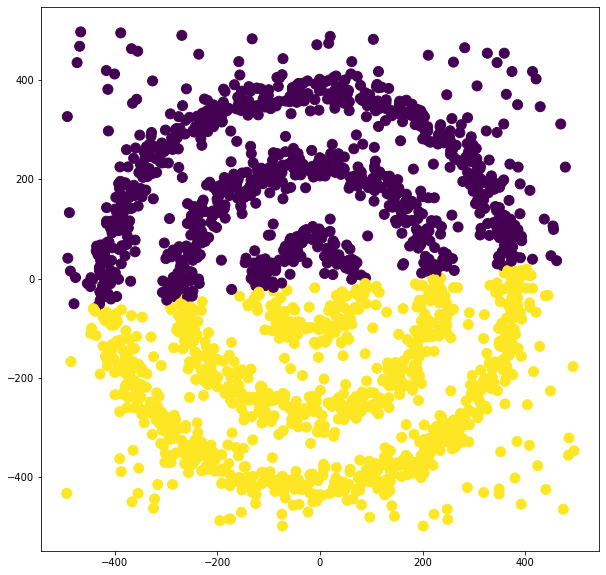

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=k_means.labels_,s=100)

### Hierarchical clustering

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(df)

### Visualizing hierarchical clustering

Text(0, 0.5, 'Feature 1')

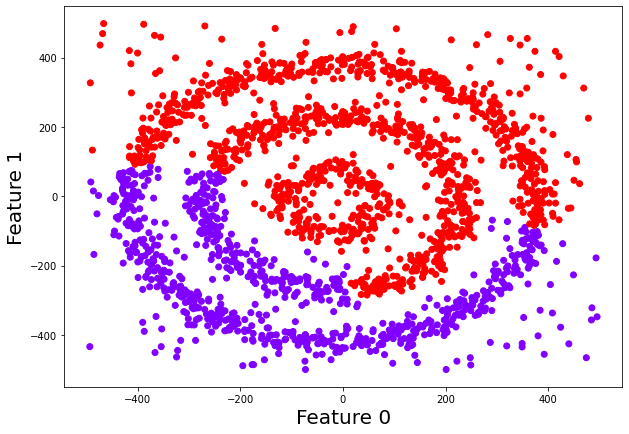

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(df[0], df[1], c=hc.labels_, cmap='rainbow')
plt.xlabel('Feature 0',fontsize=20)
plt.ylabel('Feature 1', fontsize=20)

### Applying DBSCAN without parameters

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df)

DBSCAN()

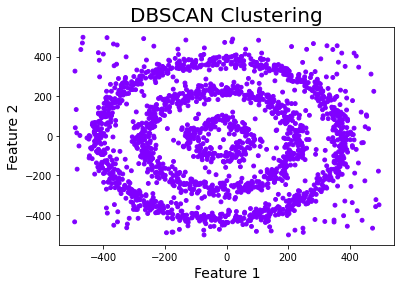

In [ ]:
df['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],s=15,cmap='rainbow')
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

### 
The data points clutered above using k-means and hierarchical shows that it has failed to cluster the data properly

While DBSCAN has clustered all the points into a single cluster.This could be due to the default values of epsilon and minimum points

the value of epsilon(default value)is very small and clustering has failed.

So, we need to optimize epsilon and min points parameter

In [ ]:
df.shape
dbscan.labels_


array([-1, -1, -1, ..., -1, -1, -1])

### Evaluate the optimum values of Hyperparameters

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

In [ ]:
distances.shape

(2000, 2)

In [ ]:
# Plotting K-distance Graph
import numpy as np
distances = np.sort(distances, axis=0)


Text(0, 0.5, 'Epsilon')

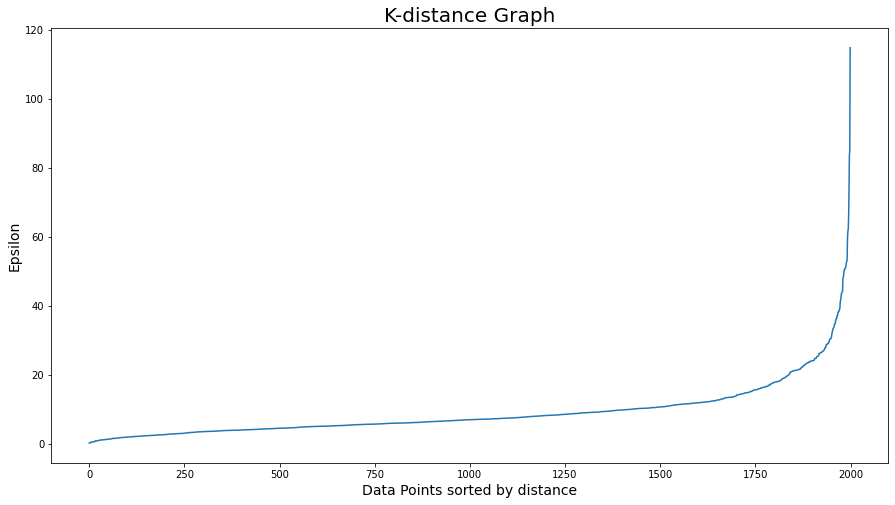

In [ ]:
# distance variable contains an array of distances between a data point and rest of points
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
#plt.axhline(y=0.075, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
#plt.show()

### The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case. So epsilon can be. value >=30


In [ ]:
eps=20
K=range(4,10)
for min_samples in K:
  clusterer = DBSCAN(eps=eps, min_samples=min_samples)
  cluster_labels = clusterer.fit_predict(df)
  x= cluster_labels +2
  y = np.bincount(x)
  ii = np.nonzero(y)[0]
  results = list(zip(ii,y[ii]) )
  #print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', (results))
  print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))

eps= 20 | min_samples=  4 | obtained clustering:  13
eps= 20 | min_samples=  5 | obtained clustering:  11
eps= 20 | min_samples=  6 | obtained clustering:  18
eps= 20 | min_samples=  7 | obtained clustering:  36
eps= 20 | min_samples=  8 | obtained clustering:  46
eps= 20 | min_samples=  9 | obtained clustering:  64


This shows the number of clusters obtained for different values of epsilon.
So, min points can be chosen for value which yielded maximum clusters. It also depends on domain knowledge

### the hyperparameters obtained are epsilon=20 and minpoints=10

### Task 4: Applying DBSCAN algorithm with Hyperparameters to cluster the data

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=5)
dbscan_opt.fit(df2[[0,1]])

DBSCAN(eps=30)

In [ ]:
df2['DBSCAN_opt_labels']=dbscan_opt.labels_
df2['DBSCAN_opt_labels'].value_counts()

 0    984
 1    662
 2    216
-1    138
Name: DBSCAN_opt_labels, dtype: int64

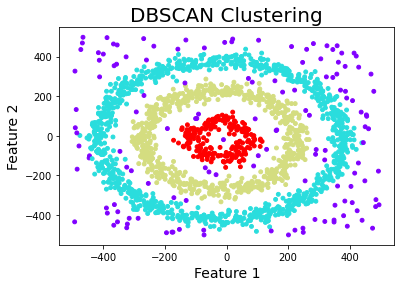

In [ ]:
#df['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
plt.scatter(df2[0],df2[1],c=df2['DBSCAN_opt_labels'],s=15,cmap='rainbow')
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

###Inferences:

###
I tried with different values of epsilon and min points
epsilon value should be greater and min points should be lesser
In this case, after hyper parameter tuning and running for diff values
eps=30 and min points-between 4 and 6
seems to be suitable
